In [1]:
import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/YoongiKim/CIFAR-10-images.git

Cloning into 'CIFAR-10-images'...
remote: Enumerating objects: 60027, done.
remote: Total 60027 (delta 0), reused 0 (delta 0), pack-reused 60027
Receiving objects: 100% (60027/60027), 19.94 MiB | 19.61 MiB/s, done.
Resolving deltas: 100% (59990/59990), done.
Updating files: 100% (60001/60001), done.


In [3]:
TRAINING_DIR = 'CIFAR-10-images/test'
CATEGORY_LIST = os.listdir(TRAINING_DIR)
print(CATEGORY_LIST)

['horse', 'ship', 'frog', 'cat', 'automobile', 'dog', 'bird', 'deer', 'truck', 'airplane']


In [4]:
TRAINING_DATA = []
for category in CATEGORY_LIST:
    path = os.path.join(TRAINING_DIR, category)
    class_num = CATEGORY_LIST.index(category)
    for image_file in tqdm(os.listdir(path)):
        image_array = cv2.imread(os.path.join(path, image_file), cv2.IMREAD_GRAYSCALE)
        TRAINING_DATA.append([image_array, class_num])

100%|██████████| 1000/1000 [00:00<00:00, 14537.71it/s]


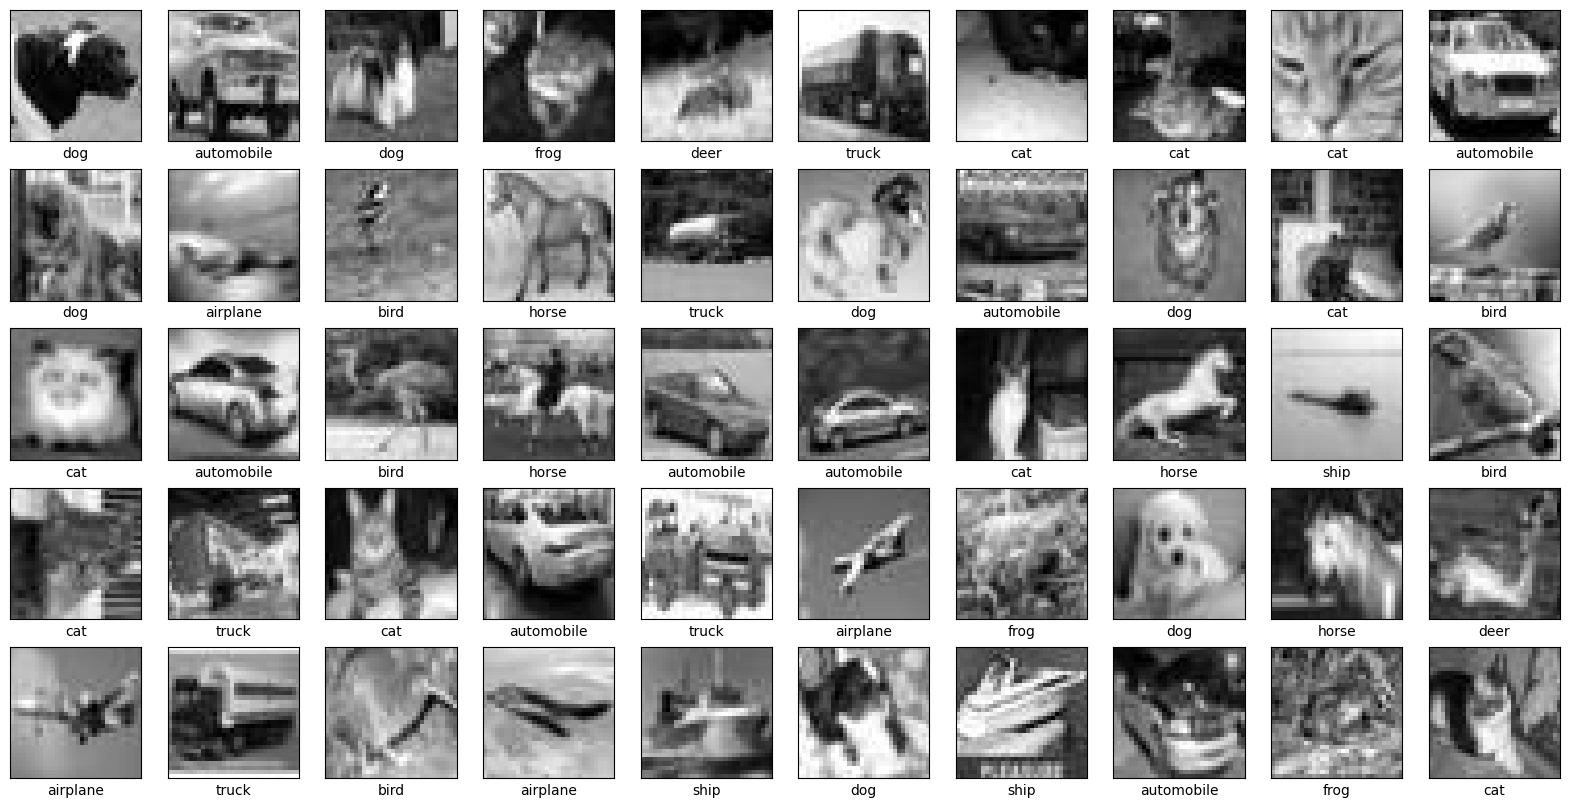

In [5]:
random.shuffle(TRAINING_DATA)

plt.figure(figsize=(20, 10))
for i in range(50):
    plt.subplot(5, 10, i + 1)
    plt.imshow(TRAINING_DATA[i][0], cmap='gray')
    plt.xlabel(CATEGORY_LIST[TRAINING_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i == 49:
        break
plt.show()

In [25]:
images_per_fold = 10
folds = [TRAINING_DATA[i:i+images_per_fold] for i in range(0, len(TRAINING_DATA), images_per_fold)]

In [21]:
def plot_accuracies(fold_num, k_values, accuracy_data):
    best_result = [0, 0]
    for k in k_values:
        accuracy_values = accuracy_data[k]
        if best_result[1] < max(accuracy_values):
            best_result[0] = k
            best_result[1] = max(accuracy_values)
        plt.scatter([k] * len(accuracy_values), accuracy_values)

    accuracies_mean = np.array([np.mean(values) for key, values in sorted(accuracy_data.items())])
    accuracies_std = np.array([np.std(values) for key, values in sorted(accuracy_data.items())])
    plt.errorbar(k_values, accuracies_mean, yerr=accuracies_std)
    plt.title(f"Cross-validation   fold={fold_num}   K={best_result[0]}   Accuracy = {best_result[1]}")
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.show()

k_values = [1, 3, 5, 7, 9]
k_values_error_l1 = {k: [] for k in k_values}
k_values_error_l2 = {k: [] for k in k_values}


100%|██████████| 10/10 [00:02<00:00,  4.23it/s]


Fold 0, k = 1, L1 accuracy = 10.00%, L2 accuracy = 20.00%


100%|██████████| 10/10 [00:02<00:00,  3.43it/s]


Fold 0, k = 3, L1 accuracy = 10.00%, L2 accuracy = 0.00%


100%|██████████| 10/10 [00:02<00:00,  4.80it/s]


Fold 0, k = 5, L1 accuracy = 20.00%, L2 accuracy = 0.00%


100%|██████████| 10/10 [00:02<00:00,  4.90it/s]


Fold 0, k = 7, L1 accuracy = 30.00%, L2 accuracy = 0.00%


100%|██████████| 10/10 [00:02<00:00,  4.96it/s]


Fold 0, k = 9, L1 accuracy = 30.00%, L2 accuracy = 0.00%


100%|██████████| 10/10 [00:02<00:00,  4.87it/s]


Fold 1, k = 1, L1 accuracy = 10.00%, L2 accuracy = 10.00%


100%|██████████| 10/10 [00:02<00:00,  3.55it/s]


Fold 1, k = 3, L1 accuracy = 10.00%, L2 accuracy = 0.00%


100%|██████████| 10/10 [00:02<00:00,  4.08it/s]


Fold 1, k = 5, L1 accuracy = 10.00%, L2 accuracy = 0.00%


100%|██████████| 10/10 [00:02<00:00,  4.96it/s]


Fold 1, k = 7, L1 accuracy = 10.00%, L2 accuracy = 0.00%


100%|██████████| 10/10 [00:01<00:00,  5.05it/s]


Fold 1, k = 9, L1 accuracy = 10.00%, L2 accuracy = 0.00%


100%|██████████| 10/10 [00:02<00:00,  4.92it/s]


Fold 2, k = 1, L1 accuracy = 20.00%, L2 accuracy = 40.00%


100%|██████████| 10/10 [00:02<00:00,  4.98it/s]


Fold 2, k = 3, L1 accuracy = 10.00%, L2 accuracy = 30.00%


100%|██████████| 10/10 [00:03<00:00,  3.17it/s]


Fold 2, k = 5, L1 accuracy = 0.00%, L2 accuracy = 30.00%


100%|██████████| 10/10 [00:02<00:00,  4.69it/s]


Fold 2, k = 7, L1 accuracy = 10.00%, L2 accuracy = 40.00%


100%|██████████| 10/10 [00:02<00:00,  4.01it/s]


Fold 2, k = 9, L1 accuracy = 0.00%, L2 accuracy = 30.00%


100%|██████████| 10/10 [00:01<00:00,  5.03it/s]


Fold 3, k = 1, L1 accuracy = 40.00%, L2 accuracy = 20.00%


100%|██████████| 10/10 [00:01<00:00,  5.03it/s]


Fold 3, k = 3, L1 accuracy = 30.00%, L2 accuracy = 10.00%


100%|██████████| 10/10 [00:02<00:00,  4.40it/s]


Fold 3, k = 5, L1 accuracy = 30.00%, L2 accuracy = 10.00%


100%|██████████| 10/10 [00:02<00:00,  3.37it/s]


Fold 3, k = 7, L1 accuracy = 30.00%, L2 accuracy = 20.00%


100%|██████████| 10/10 [00:02<00:00,  4.99it/s]


Fold 3, k = 9, L1 accuracy = 20.00%, L2 accuracy = 20.00%


100%|██████████| 10/10 [00:02<00:00,  4.97it/s]


Fold 4, k = 1, L1 accuracy = 50.00%, L2 accuracy = 40.00%


100%|██████████| 10/10 [00:02<00:00,  4.96it/s]


Fold 4, k = 3, L1 accuracy = 50.00%, L2 accuracy = 40.00%


100%|██████████| 10/10 [00:03<00:00,  2.66it/s]


Fold 4, k = 5, L1 accuracy = 40.00%, L2 accuracy = 40.00%


100%|██████████| 10/10 [00:03<00:00,  3.26it/s]


Fold 4, k = 7, L1 accuracy = 30.00%, L2 accuracy = 30.00%


100%|██████████| 10/10 [00:02<00:00,  4.93it/s]


Fold 4, k = 9, L1 accuracy = 20.00%, L2 accuracy = 30.00%


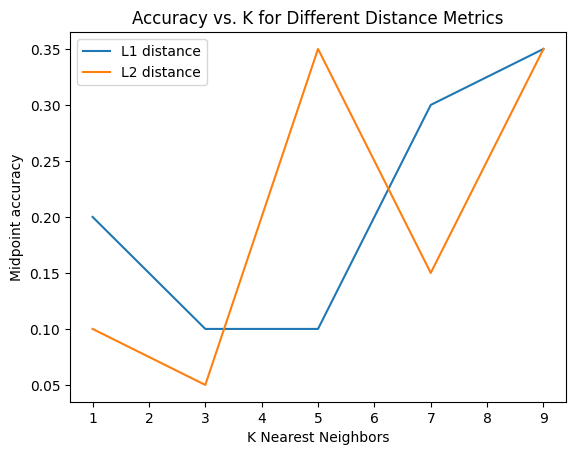

In [24]:
for i in range(5):
    # Define training and validation sets
    training_set = [fold for j, fold in enumerate(folds) if j != i]
    validation_set = folds[i]

    l1_accuracies = []
    l2_accuracies = []

    for k in k_values:
        l1_correct = 0
        l2_correct = 0
        total = 0

        for validation_data in tqdm(validation_set):
            v_img = validation_data[0]
            v_label = validation_data[1]
            l1_scores = []
            l2_scores = []

            for fold in training_set:
                for training_data in fold:
                    t_img = training_data[0]
                    t_label = training_data[1]

                    l1_dist = np.sum(np.abs(t_img - v_img))
                    l1_scores.append((l1_dist, t_label))

                    l2_dist = np.sqrt(np.sum((t_img - v_img) ** 2))
                    l2_scores.append((l2_dist, t_label))

            sorted_l1_scores = sorted(l1_scores, key=lambda x: x[0])[:k]
            l1_neighbors = [s[1] for s in sorted_l1_scores]
            l1_prediction = max(set(l1_neighbors), key=l1_neighbors.count)

            sorted_l2_scores = sorted(l2_scores, key=lambda x: x[0])[:k]
            l2_neighbors = [s[1] for s in sorted_l2_scores]
            l2_prediction = max(set(l2_neighbors), key=l2_neighbors.count)

            if l1_prediction == v_label:
                l1_correct += 1
            if l2_prediction == v_label:
                l2_correct += 1
            total += 1

        l1_accuracy = l1_correct / total
        l1_accuracies.append(l1_accuracy)
        k_values_error_l1[k].append(l1_accuracy)

        l2_accuracy = l2_correct / total
        l2_accuracies.append(l2_accuracy)
        k_values_error_l2[k].append(l2_accuracy)

        print("Fold {}, k = {}, L1 accuracy = {:.2f}%, L2 accuracy = {:.2f}%".format(i, k, l1_accuracy * 100, l2_accuracy * 100))

    min_l1_accuracy = min(l1_accuracies)
    max_l1_accuracy = max(l1_accuracies)
    midpoint_l1_accuracy = (min_l1_accuracy + max_l1_accuracy) / 2
    midpoint_l1_accuracies.append(midpoint_l1_accuracy)

    min_l2_accuracy = min(l2_accuracies)
    max_l2_accuracy = max(l2_accuracies)
    midpoint_l2_accuracy = (min_l2_accuracy + max_l2_accuracy) / 2
    midpoint_l2_accuracies.append(midpoint_l2_accuracy)

# Plot accuracy vs. K for different distance metrics
plt.plot(k_values, midpoint_l1_accuracies, label='L1 distance')
plt.plot(k_values, midpoint_l2_accuracies, label='L2 distance')
plt.xlabel('K Nearest Neighbors')
plt.ylabel('Midpoint accuracy')
plt.title('Accuracy vs. K for Different Distance Metrics')
plt.legend()
plt.show()

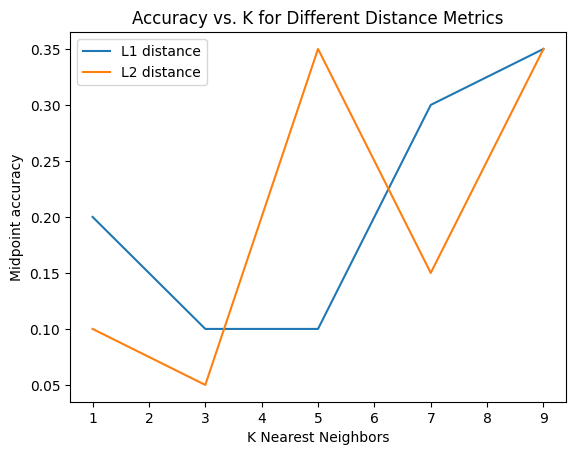

In [26]:
plt.plot(k_values, midpoint_l1_accuracies, label='L1 distance')
plt.plot(k_values, midpoint_l2_accuracies, label='L2 distance')
plt.xlabel('K Nearest Neighbors')
plt.ylabel('Midpoint accuracy')
plt.title('Accuracy vs. K for Different Distance Metrics')
plt.legend()
plt.show()

We compared the performance of Manhattan (L1) and Euclidean (L2) distances using 5-fold cross-validation on the CIFAR-10 dataset. We considered the dataset's characteristics, the nature of grayscale features, and class complexity.

Results showed that L1 distance outperformed L2 for K-Nearest Neighbors classification. This is likely due to grayscale features, making L1, which emphasizes absolute differences, more suitable.

However, further hyperparameter tuning and feature engineering could enhance accuracy. Exploring advanced algorithms is also an option. In summary, for this grayscale CIFAR-10 dataset, L1 distance is more effective, but optimization and advanced techniques can be explored for better performance.